In [ ]:

import os
import numpy as np
from tqdm import tqdm
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from skimage.util import view_as_blocks
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
import albumentations as A
from collections import Counter
import seaborn as sns
import random
print("✅ Libraries imported\n")
from PIL import Image

✅ Libraries imported



In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
print("\n✅ Google Drive mounted")

Mounted at /content/drive

✅ Google Drive mounted



🔍 Detailed Dataset Analysis


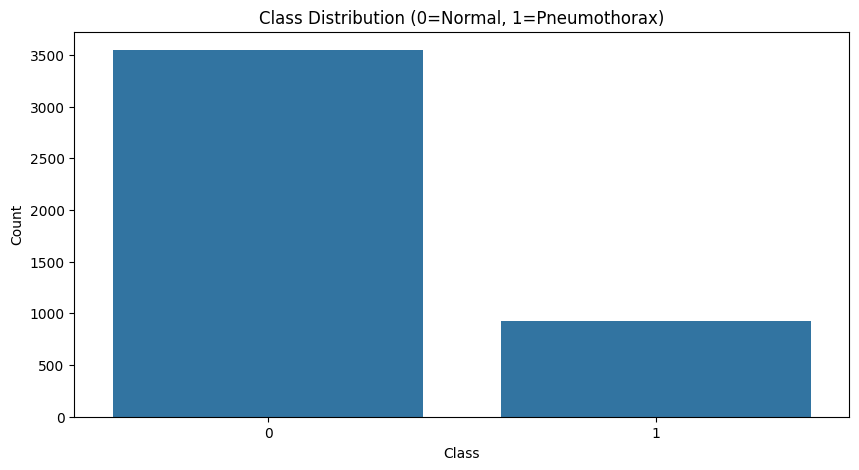


📈 Class Ratio: 3.8:1 (Normal:Pneumothorax)


In [ ]:
print("\n🔍 Detailed Dataset Analysis")
print("="*50)
#Class Distribution Analysis
plt.figure(figsize=(10,5))
# Extract class labels
sns.countplot(x=[f.split('_')[2] for f in all_files])
# Y-axis label (Count)
plt.ylabel("Count")
# X-axis label (Class)
plt.xlabel("Class")
# Set plot title
plt.title("Class Distribution (0=Normal, 1=Pneumothorax)")
# Display plot
plt.show()
# Class imbalance ratio
print(f"\n📈 Class Ratio: {len(negative_files)/len(positive_files):.1f}:1 (Normal:Pneumothorax)")

In [ ]:
# Define the path for pneumothorax
BasePath = "/content/drive/MyDrive/siim-acr-pneumothorax/"
# Define the path for Train masks
TrainMskDir = os.path.join(BasePath, "train_masks")
# Define the path for Train images
TrainImageDir = os.path.join(BasePath, "train_images")
print("\n🔍 Scanning dataset...")
# Display the files in Trained image
AllFiles = [f for f in os.listdir(TrainImageDir) if f.endswith('.png')]
# Display the Negative Files showing no pneumothorax
NegativeFiles = [f for f in AllFiles if f.split('_')[2] == '0']
# Display the Positive Files showing pneumothorax
PositiveFiles = [f for f in AllFiles if f.split('_')[2] == '1']
# Dataset stats
print(f"\n📊 Dataset Stats:")
# Display the total no of samples
print(f" - Total samples: {len(AllFiles):,}")
# Display the no of Positive cases
print(f" - Positive cases: {len(PositiveFiles):,} (pneumothorax)")
#Display the no of Negative cases
print(f" - Negative cases: {len(NegativeFiles):,}")


🔍 Scanning dataset...

📊 Dataset Stats:
 - Total samples: 4,471
 - Positive cases: 923 (pneumothorax)
 - Negative cases: 3,548



[ ] Creating balanced dataset...
[✔] Selected 1000 files (500 positive, 500 negative)

[ ] Displaying sample images...


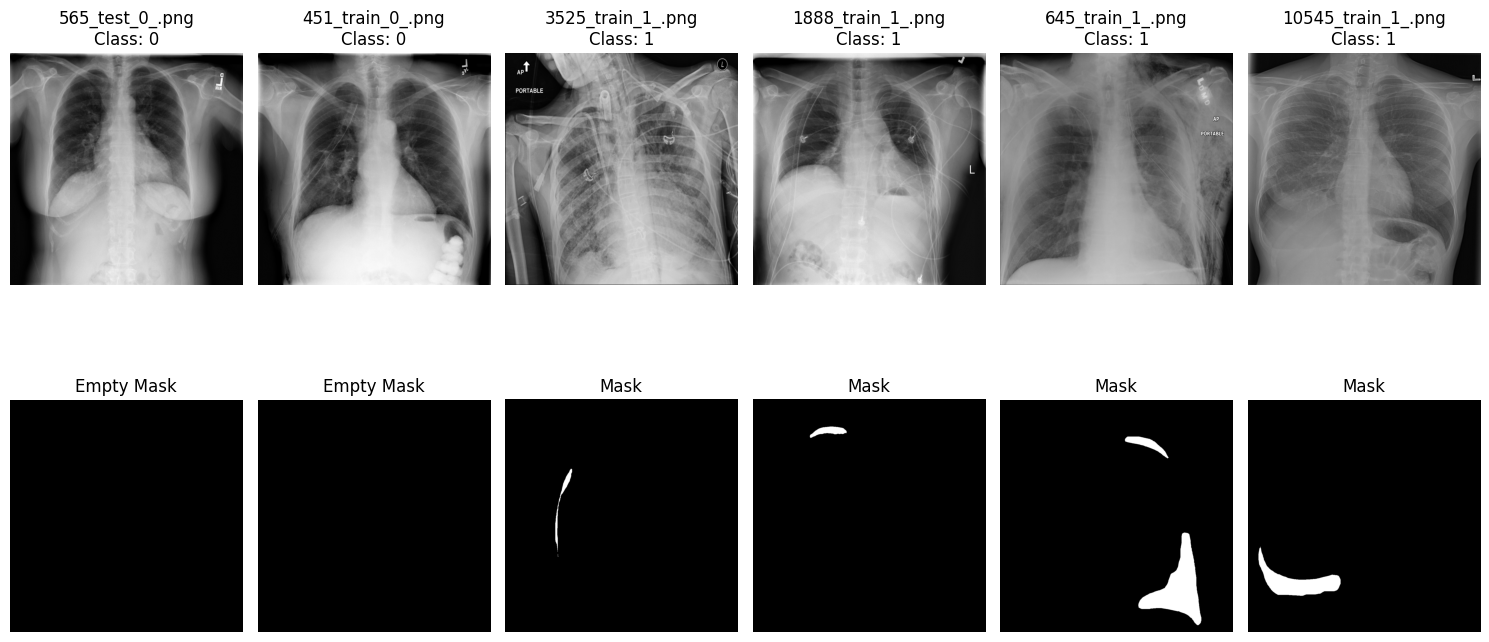

In [ ]:
# Create a balanced dataset
print("\n[ ] Creating balanced dataset...")
# Creating a samplesize with minimum capacity as 500
SampleSize = min(500, len(PositiveFiles), len(NegativeFiles))
BalancedFiles = ( random.sample(PositiveFiles, SampleSize) + random.sample(NegativeFiles, SampleSize))
# Shuffle the balanced files
random.shuffle(BalancedFiles)
print(f"[✔] Selected {len(BalancedFiles)} files ({SampleSize} positive, {SampleSize} negative)")
# Displaying sample images
print("\n[ ] Displaying sample images...")
plt.figure(figsize=(16, 7))
# Loop through the first 6 files
for i, filename in enumerate(BalancedFiles[:6]):
    # Read masks
    mask = plt.imread(os.path.join(TrainMskDir, filename))
    # Read images
    img = plt.imread(os.path.join(TrainImageDir, filename))
    # Plot the top row image
    plt.subplot(2, 6, i+1)
    plt.imshow(img, cmap='gray')
    # Plot the filename and the class
    plt.title(f"{filename}\nClass: {filename.split('_')[2]}")
    plt.axis('off')
    # Bottom row mask
    plt.subplot(2, 6, i+7)
    # Display the grayscale mask
    plt.imshow(mask, cmap='gray')
    # Status of the mask
    plt.title("Mask" if mask.max() > 0 else "Empty Mask")
    # Hide the axes
    plt.axis('off')
# Adjust the layout spacing
plt.tight_layout()
# Display the figure
plt.show()

In [ ]:
# Verify positive cases having valid masks
ValidPositiveFiles = []
# Initialize the Empty Mask count to 0
EmptyMskCount = 0
# Looping over the Positive Files
for f in tqdm(PositiveFiles, desc="Checking positive cases"):
    mask = np.array(Image.open(os.path.join(TrainMskDir, f)))
    # Check whether the maximum of mask is greater than 0
    if mask.max() > 0:
        #Append the positive files to the Valid Positive Files
        ValidPositiveFiles.append(f)
    else:
        # Count the no of EmptyMask
        EmptyMskCount += 1
# Computing the ratio for the positive cases with empty masks
print(f"[❗] Found {EmptyMskCount}/{len(PositiveFiles)} positive cases with empty masks")

Checking positive cases: 100%|██████████| 923/923 [07:32<00:00,  2.04it/s]

[❗] Found 0/923 positive cases with empty masks
